# Machine Learning Final Exam, Aug Semester, 2019

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.
Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Generate 200 2D points from each of 2 Guassians with distributions shaped roughly as shown in the diagram below, with class 1 as the 'X's and class 2 as the 'O's. Plot the resulting 400 points with different colors for each Gaussian.



In [1]:
# np.ones((200,1)).shape
# np.array([y_c1]).T.shape
# X1.shape

In [1]:
import numpy as np
import matplotlib.pyplot as plt
mean1 = [2,3]; cov1 = [[0.5,0], [0,0.5]]
x_c1, y_c1 = np.random.multivariate_normal(mean1, cov1, 200).T
np.matrix([x_c1]).T.shape
X1 = np.c_[np.ones((200,1)), np.array([x_c1]).T, np.array([y_c1]).T ]
xx1 = np.c_[np.array([x_c1]).T, np.array([y_c1]).T]
mean2 = [4,4]; cov2 = [[0.5,0], [0,0.5]]
x_c2, y_c2 = np.random.multivariate_normal(mean2, cov2, 200).T
X2 = np.c_[np.ones((200,1)), np.array([x_c2]).T, np.array([y_c2]).T ]

xx2 = np.c_[np.array([x_c2]).T, np.array([y_c2]).T ]

plt.plot(x_c1, y_c1, 'x')
plt.plot(x_c2,y_c2, 'o')
plt.axis('equal')
plt.show()
xx = np.r_[xx1, xx2]

<Figure size 640x480 with 1 Axes>

## Question 2 (20 points)

Do the following:
1. Split the dataset from Question 1 into a training set (80%) and validation set (20%).
2. Fit a logistic regression model to the data in the training set.
3. Indicate the training set accuracy and validation set accuracy of the logistic regression model.
4. Make two separate plots, one for the training set and one for the validation set, with three colors: one for correctly classified points from class 1, one for correctly classified points from class 2, and one for incorrectly classified points.

In [2]:
X1_train = X1[0:160,:]
X1_test = X1[160:,:]
X2_train = X2[0:160,:]
X2_test = X2[160:,:]



X_train = np.concatenate((X1_train, X2_train), 0)
y_train = np.concatenate((np.zeros((160,1)), np.ones((160,1))), 0)
X_test = np.concatenate((X1_test, X2_test), 0)
y_test = np.concatenate((np.zeros((40,1)), np.ones((40,1))), 0)

def predict(X, theta):
    return 1 / (1 + np.exp(- X @ theta))

def loglike(y, ypred):
    return sum(y * np.log(ypred) + (1-y) * np.log(1-ypred))[0]

def accuracy(y, ypred):
    return sum((ypred >= 0.5) == (y == 1)) / y.size
    
test_idx_0 = (y_test==0).reshape(X_test.shape[0])
test_idx_1 = (y_test==1).reshape(X_test.shape[0])

# correctOnes = 
# plt.plot()


theta = np.array([[-4,0,1]]).T
theta_best = theta
loglike_test_best = 0
alpha = 0.001
for i in range(0,400):
    ypred_train = predict(X_train, theta)
    loglike_train = loglike(y_train, ypred_train)
    acc_train = accuracy(y_train, ypred_train)
    ypred_test = predict(X_test, theta)
    loglike_test = loglike(y_test, ypred_test)
    acc_test = accuracy(y_test, ypred_test)
    sbest = ''
    if i == 0 or loglike_test > loglike_test_best:
        loglike_test_best = loglike_test
        theta_best = theta
        sbest = '*'
    print('Iter %d: parms (%f, %f, %f), trn like %f acc %f test like %f acc %f %s' %
          (i, theta[0], theta[1], theta[2], loglike_train, acc_train, loglike_test, acc_test, sbest))
    dtheta = X_train.T @ (y_train - ypred_train)
    theta = theta + alpha * dtheta

Iter 0: parms (-4.000000, 0.000000, 1.000000), trn like -176.654413 acc 0.718750 test like -43.161979 acc 0.775000 *
Iter 1: parms (-3.965891, 0.234370, 1.153142), trn like -156.061501 acc 0.721875 test like -38.098349 acc 0.762500 *
Iter 2: parms (-4.013879, 0.197536, 1.010093), trn like -144.750195 acc 0.840625 test like -35.305502 acc 0.837500 *
Iter 3: parms (-4.021846, 0.282489, 1.008418), trn like -139.656390 acc 0.831250 test like -33.974198 acc 0.837500 *
Iter 4: parms (-4.045096, 0.314206, 0.952264), trn like -135.507516 acc 0.865625 test like -32.910471 acc 0.875000 *
Iter 5: parms (-4.060451, 0.367036, 0.924469), trn like -131.884106 acc 0.878125 test like -31.950487 acc 0.887500 *
Iter 6: parms (-4.078565, 0.407392, 0.887070), trn like -128.625371 acc 0.903125 test like -31.097542 acc 0.900000 *
Iter 7: parms (-4.094825, 0.450159, 0.856539), trn like -125.673972 acc 0.909375 test like -30.313211 acc 0.925000 *
Iter 8: parms (-4.111282, 0.489082, 0.825569), trn like -122.992

Iter 167: parms (-5.710023, 1.720719, 0.210985), trn like -77.890013 acc 0.921875 test like -16.844177 acc 0.950000 *
Iter 168: parms (-5.718150, 1.722256, 0.211948), trn like -77.820739 acc 0.921875 test like -16.830218 acc 0.950000 *
Iter 169: parms (-5.726263, 1.723780, 0.212917), trn like -77.751722 acc 0.921875 test like -16.816348 acc 0.950000 *
Iter 170: parms (-5.734361, 1.725292, 0.213893), trn like -77.682960 acc 0.921875 test like -16.802565 acc 0.950000 *
Iter 171: parms (-5.742446, 1.726791, 0.214876), trn like -77.614450 acc 0.921875 test like -16.788867 acc 0.950000 *
Iter 172: parms (-5.750516, 1.728279, 0.215865), trn like -77.546190 acc 0.921875 test like -16.775254 acc 0.950000 *
Iter 173: parms (-5.758572, 1.729755, 0.216860), trn like -77.478180 acc 0.921875 test like -16.761724 acc 0.950000 *
Iter 174: parms (-5.766615, 1.731219, 0.217861), trn like -77.410416 acc 0.921875 test like -16.748276 acc 0.950000 *
Iter 175: parms (-5.774643, 1.732672, 0.218867), trn lik

Iter 334: parms (-6.902265, 1.894731, 0.396591), trn like -68.944849 acc 0.921875 test like -15.240091 acc 0.950000 *
Iter 335: parms (-6.908563, 1.895544, 0.397666), trn like -68.903401 acc 0.921875 test like -15.233276 acc 0.950000 *
Iter 336: parms (-6.914852, 1.896355, 0.398740), trn like -68.862064 acc 0.921875 test like -15.226485 acc 0.950000 *
Iter 337: parms (-6.921132, 1.897165, 0.399812), trn like -68.820838 acc 0.921875 test like -15.219715 acc 0.950000 *
Iter 338: parms (-6.927405, 1.897973, 0.400883), trn like -68.779723 acc 0.921875 test like -15.212968 acc 0.950000 *
Iter 339: parms (-6.933669, 1.898781, 0.401953), trn like -68.738717 acc 0.921875 test like -15.206242 acc 0.950000 *
Iter 340: parms (-6.939924, 1.899587, 0.403022), trn like -68.697822 acc 0.921875 test like -15.199539 acc 0.950000 *
Iter 341: parms (-6.946171, 1.900392, 0.404090), trn like -68.657035 acc 0.921875 test like -15.192858 acc 0.950000 *
Iter 342: parms (-6.952410, 1.901196, 0.405156), trn lik

Best parameters: (-7.294903, 1.945197, 0.463855)


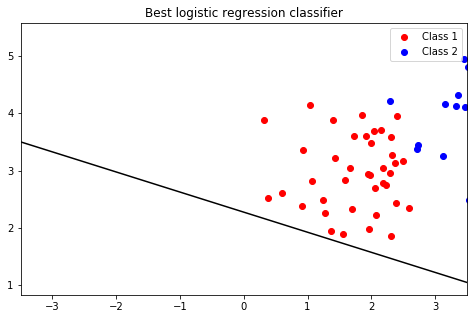

In [3]:
def plot_line(plot_handle, theta):
    X11 = -3.5
    X12 = (- theta[0] - theta[1] * X11) / theta[2]
    X21 = 3.5
    X22 = (- theta[0] - theta[1] * X21) / theta[2]
    plot_handle.plot([X11, X21], [X21, X22], 'k-')

plt.figure(figsize=(8, 5))
plt.plot(X_test[test_idx_0, 1], X_test[test_idx_0, 2], 'ro', label='Class 1')
plt.plot(X_test[test_idx_1, 1], X_test[test_idx_1, 2], 'bo', label='Class 2')
plot_line(plt, theta_best)
plt.xlim([-3.5,3.5])
plt.legend()
plt.title('Best logistic regression classifier')

print('Best parameters: (%f, %f, %f)' % (theta_best[0], theta_best[1], theta_best[2]))

## Question 3 (20 points)

Do the following:
1. Use the SVM code developed in class to fit linear SVMs to the training data from Question 2. Use several different values of hyperparameter c (the tolerance to points crossing the hyperplane), and plot validation set accuracy as a function of c.
2. Explain which model is best and why.

In [4]:
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
y = np.concatenate([np.matrix(np.zeros([200,1])),np.matrix(np.ones([200,1]))]);
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, y, test_size=0.2, random_state=42)

X = np.concatenate((X1, X2), 0)
X = np.matrix(X)
print(X.shape)
y = np.matrix([np.r_[np.zeros((200)), np.ones((200))]])
model = SVC(kernel='linear', C = 1E343)


(400, 3)


In [ ]:
model.fit(xx,y.T)

##This takes a lot of time to code

/home/prithvi/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(model.support_vectors_)
# predict = model.predict(xx_test)
plt.scatter(xx[:,0], xx[:, 1], c=y.reshape(400,), s=50, cmap='winter')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

In [ ]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt

def cvxopt_solve_qp(Q, c, A=None, b=None, E=None, d=None):
    Q = .5 * (Q + Q.T)  # make sure Q is symmetric
    args = [cvxopt.matrix(Q), cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
        if E is not None:
            args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return np.array(sol['x']).reshape((Q.shape[1],))

X = np.concatenate((X1, X2), 0)
X = np.matrix(X)
type(X)

y = np.concatenate((-np.ones((200,1)), np.ones((200,1))), 0)

m = X.shape[0];
n = X.shape[1];

# Transform data set so that each attribute has a
# mean of 0 and a standard deviation of 1

def preprocess(X):
    means = X.mean(0);
    scales = 1/np.std(X,0);
    Xh = np.concatenate([X.T,np.ones([1,20])],0);
    Tm = np.matrix(np.eye(3));
    Tm[0:2,2:3] = -X.mean(0).T;
    Ts = np.matrix(np.eye(3));
    Ts[0:2,0:2] = np.diagflat(scales);
    T = Ts*Tm;
    XX = (T * Xh);
    XX = XX[0:2,:].T;
    return XX, T;

# RBF/Gaussian kernel

def gauss_kernel(X):
    sigma = 0.2
    m = X.shape[0];
    K = np.matrix(np.zeros([m,m]));
    for i in range(0,m):
        for j in range(0,m):
            K[i,j] = (X[i,:] - X[j,:]) * (X[i,:] - X[j,:]).T
    K = np.exp(-K/(2*sigma*sigma))      
    return K;

def linear_kernel(X):
    m = X.shape[0];
    K = np.matrix(np.zeros([m,m]));
    for i in range(0,m):
        for j in range(0,m):
            K[i,j] = X[i,:]*(X[j,:].T)
    return K;

# Linear kernel below. We might also try
# XX, T = preprocess(X)
# K = gauss_kernel(XX)
#print(X)
K = linear_kernel(X);
#print(K)
Q = np.multiply(y * y.T, K)
print('Q rank: %d' % np.linalg.matrix_rank(Q))
c = -np.ones([m]);
A = -np.eye(m);
b = np.zeros([m]);
E = y.T;
d = np.zeros(1);
alpha_star = cvxopt_solve_qp(Q, c, A, b, E, d);
print("Optimal alpha:")
print(alpha_star)

def get_wb(X, y, alpha):
    # Find the support vectors
    S = alpha > 1e-6 #threshold
    XS = X[S,:]
    yS = y[S]
    alphaS = alpha[S]
    alphaSyS = np.tile(np.multiply(yS.T, alphaS).T, n)
    w = sum(np.multiply(alphaSyS, XS)).T
    # Find b
    KS = K[S,:][:,S]
    NS = yS.shape[0]
    b = (np.sum(yS) - np.sum(np.multiply(alphaS,yS.T)*KS))/NS
    # Normalize w,b
    scalef = np.linalg.norm(w)
    w = w / scalef
    b = b / scalef
    return w,b

w,b = get_wb(X, y, alpha_star)

print("Optimal w: [%f,%f] b: %f" % (w[0],w[1],b))
plot_mf(Xf,Xm)

def plot_w(w,b):
    ylim = plt.axes().get_ylim()
    xlim = plt.axes().get_xlim()
    p1 = (xlim[0], - (w[0,0] * xlim[0] + b) / w[1,0])
    p2 = (xlim[1], - (w[0,0] * xlim[1] + b) / w[1,0])
    plt.plot((p1[0],p2[0]), (p1[1],p2[1]), 'r-')

plot_w(w,b)

## Question 4 (20 points)

Do the following:
1. Use the SVM code developed in class to fit SVMs with the RBF kernel to the training data from Question 2. Use several different values of hyperparameter c (the tolerance to points crossing the hyperplane) and gamma (the basis function width), and plot validation set accuracy as a function of c and gamma.
2. Explain which model is best and why.

In [8]:
from sklearn.model_selection import train_test_split
# xx_train, xx_test, yy_train, yy_test = train_test_split(xx, y.T, test_size=0.2, random_state=42)

# model2 = SVC(kernel='rbf', C = 1E343)
# plt.scatter(xx_train[:,0], xx_train[:, 1], c=y.reshape(400,), s=50, cmap='winter')
# plt.scatter(model2.support_vectors_[:,0],model2.support_vectors_[:,1])
# model2.fit(xx_train,yy_train)
# y_pred = model2.predict(xx_test)


## Question 5 (20 points)

Using the neural network code you developed (based on the code from class) for the deep learning homework assignment, do the following:
1. Fit a two-layer neural network with ReLU activations in the hidden layer and a logistic output layer to the training data from Question 2. Use several different numbers of hidden units in the hidden layer, and plot validation set accuracy as a function of the number of units in the hidden layer.
2. Explain which neural network is best and why, and briefly compare the neural network to the logistic regression and SVM models developed in the previous questions.

In [9]:
xx_train = X_train
y = np.matrix([np.r_[np.zeros((200)), np.ones((200))]])
# #-----------------------------------------------------------------------
M = 400
N = 2

def act(z):
    return 1/(1+np.exp(-z))

def actder(z):
    az = act(z)
    prod = np.multiply(az,1-az)
    return prod

def ff(x,W,b):
    L = len(W)-1
    a = x
    for l in range(1,L+1):
        z = W[l].T*a+b[l]
        a = act(z)
    return a

def loss(y,yhat):
    return -((1-y) * np.log(1-yhat) + y * np.log(yhat))


# Normalize each input feature

def normalize(X):
    M = X.shape[0]
    # XX = X - mean of features of X
    XX = X - np.tile(np.mean(X,0),[M,1])
    # Divide each element of XX by std of X
    XX = np.divide(XX, np.tile(np.std(XX,0),[M,1]))
    
    XX_new = np.divide(X, np.tile(np.std(XX,0),[M,1]))
    return XX, XX_new

XX, XX_new = normalize(xx_train)

y = y.T

/home/prithvi/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


In [18]:
# Initialize weights for units in each layer


h2 = 10
h1 = 8
# h3 = 6
# h4 = 3
# Initialize weights for units in each layer
W = [[], np.random.normal(0,0.1,[N,h1]),
         np.random.normal(0,0.1,[h1,h2]),
#          np.random.normal(0,0.1,[h2,h3]),
#          np.random.normal(0,0.1,[h3,h4]),
         np.random.normal(0,0.1,[h2,1])]

b = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
#          np.random.normal(0,0.1,[h3,1]),
#          np.random.normal(0,0.1,[h4,1]),
         np.random.normal(0,0.1,[1,1])]

L = len(W)-1
# Use mini-batch size 1

alpha = 0.001
max_iter = 200
loss_NN = []
for iter in range(0, max_iter):
    loss_this_iter = 0
    order = np.random.permutation(M)   
    #order = np.arange(0, M, 1)
    
    
    
    for i in range(0,M):
        
        # Grab the pattern order[i]
        
        x_this = xx[order[i],:].T
        y_this = y[order[i],0]
        #fig1 = plt.figure(figsize=(5,5)) 
        #ax = plt.axes() 
        #ax.set_aspect(aspect = 'equal', adjustable = 'box')
        #plt.title('Pattern')
        #plt.grid(axis='both', alpha=.25)
        #plt.plot(XX[order][:,0], XX[order][:,1],'--')
        #plt.show()
        
        # Feed forward step
        
        a = [x_this]
        z = [[]]
        delta = [[]]
        dW = [[]]
        db = [[]]
        for l in range(1,L+1):
            z.append(W[l].T*a[l-1]+b[l])
            a.append(act(z[l]))
            # Just to give arrays the right shape for the backprop step
            delta.append([]); dW.append([]); db.append([])
            
        loss_this_pattern = loss(y_this, a[L][0,0])
        loss_this_iter = loss_this_iter + loss_this_pattern
        
        # Backprop step

        delta[L] = a[L] - y_this
        for l in range(L,0,-1):
            db[l] = delta[l].copy()
            dW[l] = a[l-1] * delta[l].T
            if l > 1:
                delta[l-1] = np.multiply(actder(z[l-1]), W[l] *
                             delta[l])
                
        # Check delta calculation        
        if False:
            print('Target: %f' % y_this)
            print('y_hat: %f' % a[L][0,0])
            print(db)
            y_pred = ff(x_this,W,b)
            diff = 1e-3
            W[1][10,0] = W[1][10,0] + diff
            y_pred_db = ff(x_this,W,b)
            L1 = loss(y_this,y_pred)
            L2 = loss(y_this,y_pred_db)
            db_finite_difference = (L2-L1)/diff
            print('Original out %f, perturbed out %f' %
                 (y_pred[0,0], y_pred_db[0,0]))
            print('Theoretical dW %f, calculated db %f' %
                  (dW[1][10,0], db_finite_difference[0,0]))
        
        for l in range(1,L+1):            
            W[l] = W[l] - alpha * dW[l]
            b[l] = b[l] - alpha * db[l]
        
    #print('Iteration %d loss_train %f' % (iter, loss_this_iter))
    loss_NN.append(loss_this_iter)
fig3 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
plt.title('Iteration vs loss - Train')
plt.plot(np.arange(0, max_iter),loss_NN,'g-' )
plt.show()

ValueError: operands could not be broadcast together with shapes (10,8) (8,2) 

#### Ans2
nd with number of units, more number of units have yielded more accuracy. So by rule of thumb I will prefer more number of units in each layer.
After playing arou

Neural networks are better models as they are computationally faster, and more accurate. Also tailoring each feature is not necesaary in contrast to shallow models where each feature needs to selected and feeded to the model


## Question 6 (10 points)

Consider what would happen if you got the data from Question 1 *without labels* and were tasked with using unsupervised learning to model and understand the data set. Based on a quick visualization, you see that there seem to be two main clusters in the data and decide to build a $k$-means ($k$=2) or GMM for the dataset.

Obviously, a GMM would be appropriate, as the data were generated from a mixture of Gaussians in the first place. On the other hand, the $k$-means model would be simpler. Would it be as effective?

Do the following:
1. Write the parameters $\phi_1$, $\phi_2$, $\mathbf{\mu}_1$, $\mathbf{\mu}_2$, $\mathtt{\Sigma}_1$, $\mathtt{\Sigma}_2$ of the "ground truth" model used to generate the data in Question 1.
2. Briefly discuss whether, in practice, the $k$-means model would be worse than, equally good, or better than a GMM for this dataset.

In [ ]:
# Ground truth means and covariances for the data sets we'll generate
phi_gt = [ 0.5, 0.5 ] # Since both are equally dense

means_gt = [ [2,3], [4,4] ] # mu1 followed by mu2
sigmas_gt = [ np.matrix([[0.5, 0],[0, 0.5]]), np.matrix([[0.5,0],[0,0.5]])]


#### Ans2:
In practice, both are equally good. As each method's negative outweigh each other.

Generally GMM is chosen as the go-to solution in these set of problems, but k-means stands a chance only because the distributions are spherical or circular in this case.

K-means: 
- K-means are meant to be best when the clusters are spherical in nature, as there clusters are close to circular, because covariance matrix has 0 on non-diagnol elements.
Negatives: It will classify the 'o' point that is close to 'x' as 'x'
Similar either way as they form to gather the closest cluster.

GMM:
- Gaussian mixture model gives out the weight matrix or membership of each point to different Gaussian distributions in the space.
Similar to the previous case, the point 'o' that is close to mean of 'x' will probably have higher probability than mean with 'o'
    